<a href="https://colab.research.google.com/github/zeynebgh/CKPT1/blob/main/checkpoint8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
df = pd.read_csv("/CC GENERAL.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [11]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [12]:
df = df.drop("CUST_ID", axis = 1)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [13]:
df.fillna(df["CREDIT_LIMIT"].mean(), inplace = True)
df.fillna(df["MINIMUM_PAYMENTS"].mean(), inplace = True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,4494.449450,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,4494.449450,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [14]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [15]:
df = df + 0.0

In [16]:
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                    float64
PURCHASES_TRX                       float64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                              float64
dtype: object

In [17]:
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)
standard = normalize(x_scaled)
print(standard)

[[-0.3111836  -0.10603968 -0.18063354 ... -0.14936248 -0.22342243
   0.15333223]
 [ 0.21998422  0.03754864 -0.13125685 ...  0.00936129  0.06547495
   0.10082307]
 [ 0.12662005  0.14671135 -0.03048957 ... -0.0425096  -0.14882591
   0.1021375 ]
 ...
 [-0.15687558 -0.03929882 -0.0851684  ... -0.07943258  0.06975091
  -0.87353215]
 [-0.15422515 -0.03838723 -0.09718091 ... -0.07986655  0.06813295
  -0.85326951]
 [-0.11514228 -0.17878056  0.00847533 ... -0.0749025  -0.10568594
  -0.82907005]]


In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_principal = pca.fit_transform(standard)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ["P1", "P2"]
x_principal

,P1,P2
0,-0.485279,-0.684413
1,-0.522334,0.541237
2,0.329385,0.268545
3,-0.409262,0.009153
4,-0.559921,-0.492044
...,...,...
8945,0.328396,-0.199183
8946,0.247836,-0.119773
8947,0.188975,-0.247812
8948,-0.312638,-0.172903


In [19]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 4, affinity = "euclidean", linkage = "complete")
clust_labels = model.fit_predict(x_principal)
agglomerative = pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,2
2,1
3,0
4,0
...,...
8945,3
8946,3
8947,3
8948,0


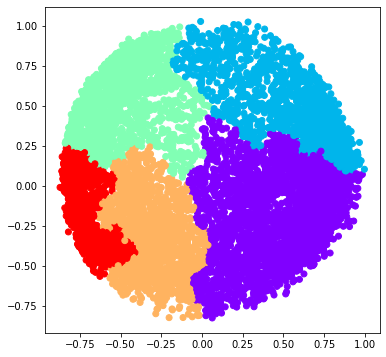

In [20]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
ac5 = AgglomerativeClustering(n_clusters = 5)
plt.figure(figsize =(6, 6))
plt.scatter(x_principal['P1'], x_principal['P2'], 
           c = ac5.fit_predict(x_principal), cmap ='rainbow')
plt.show()


In [21]:
from sklearn.cluster import KMeans 
kmeans=KMeans(n_clusters=5, random_state=0) 
kmeans.fit(x_principal)

KMeans(n_clusters=5, random_state=0)

In [22]:
labels = pd.DataFrame(kmeans.labels_)
data=pd.DataFrame(x_principal)
data2 =  pd.concat([labels, x_principal], axis=1)
data2.columns = ["labels", "BALANCE", "PURCHASES"]
data2

,labels,BALANCE,PURCHASES
0,2,-0.485279,-0.684413
1,4,-0.522334,0.541237
2,3,0.329385,0.268545
3,1,-0.409262,0.009153
4,2,-0.559921,-0.492044
...,...,...,...
8945,0,0.328396,-0.199183
8946,0,0.247836,-0.119773
8947,0,0.188975,-0.247812
8948,2,-0.312638,-0.172903


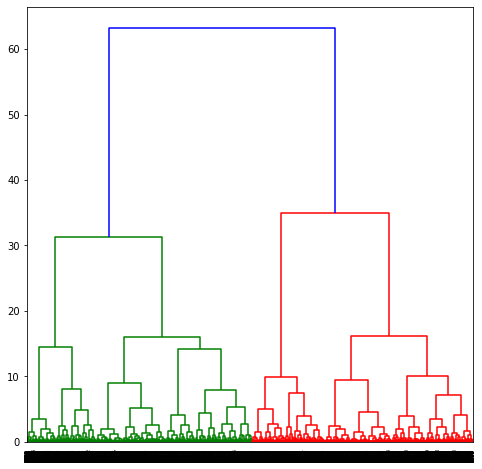

In [23]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(8, 8))
dend = shc.dendrogram(shc.linkage(x_principal, method = "ward"))

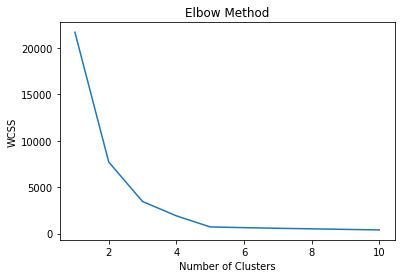

In [26]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters =i, init="k-means++", max_iter=300, n_init=10)
    kmeans.fit(data2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss);
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

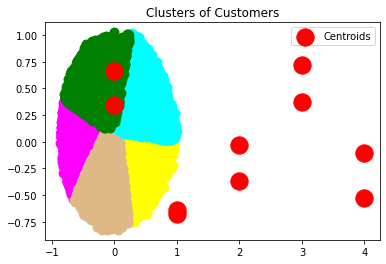

In [27]:
plt.scatter(data2["BALANCE"][data2.labels == 0],
            data2["PURCHASES"][data2.labels == 0],s=80,c='yellow')
plt.scatter(data2["BALANCE"][data2.labels == 1],
           data2["PURCHASES"][data2.labels == 1],s=80,c='magenta')
plt.scatter(data2["BALANCE"][data2.labels == 2],
           data2["PURCHASES"][data2.labels == 2],s=80,c='burlywood')
plt.scatter(data2["BALANCE"][data2.labels == 3], 
           data2["PURCHASES"][data2.labels == 3],s=80,c='cyan')
plt.scatter(data2["BALANCE"][data2.labels == 4], 
           data2["PURCHASES"][data2.labels == 4],s=80,c='green')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.legend()
plt.show()